## Data Understanding

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.insert(0, os.path.abspath('../data/'))

In [2]:
db = pd.read_pickle('data/telecom_xdr.pkl')
db.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/telecom_xdr.pkl'

In [ ]:
# column names
db.columns.tolist()

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

### Data Pre-Processing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

We'll look at:


*   Handling Null Values
*   Standardization

Others:


*   Handling Categorical Variables
*   One-Hot Encoding

Reference: [https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d](https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d) 




In [ ]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Diabetes dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)


The Diabetes dataset contains 7.35 % missing values.


In [ ]:
# drop columns with more than 30% missing values
df_clean = db.drop(['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult'], axis=1)
df_clean.shape

(101766, 45)

In [ ]:
# fill missing with ffill method for columns (diag_1, diag_2, diag_3)

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['diag_1'] = fix_missing_ffill(df_clean, 'diag_1')
df_clean['diag_2'] = fix_missing_ffill(df_clean, 'diag_2')
df_clean['diag_3'] = fix_missing_ffill(df_clean, 'diag_3')

# fill 'race' column with mode 
df_clean['race'] = df_clean['race'].fillna(df_clean['race'].mode()[0])

In [ ]:
df_clean.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df_clean=df_clean.drop(['encounter_id', 'patient_nbr', 'age'], axis=1)
df_clean.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,6,25,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,1,1,7,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,1,1,7,2,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,1,1,7,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,1,1,7,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df_clean.isnull().sum()

race                        0
gender                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      1
diag_3                      1
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

In [ ]:
df_clean['diag_1'] = df_clean['diag_1'].apply (pd.to_numeric, errors='coerce')
df_clean['diag_2'] = df_clean['diag_2'].apply (pd.to_numeric, errors='coerce')
df_clean['diag_3'] = df_clean['diag_3'].apply (pd.to_numeric, errors='coerce')


In [ ]:
df_clean.dropna(subset = ['diag_1',"diag_2",'diag_3'], inplace=True)
df_clean.isnull().sum()

race                        0
gender                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

In [31]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
df_clean['metformin'] = lb.fit_transform(df_clean['metformin'])
df_clean['repaglinide'] = lb.fit_transform(df_clean['repaglinide'])
df_clean['nateglinide'] = lb.fit_transform(df_clean['nateglinide'])
df_clean['chlorpropamide'] = lb.fit_transform(df_clean['chlorpropamide'])
df_clean['glimepiride'] = lb.fit_transform(df_clean['glimepiride'])
df_clean['acetohexamide'] = lb.fit_transform(df_clean['acetohexamide'])
df_clean['glipizide'] = lb.fit_transform(df_clean['glipizide'])
df_clean['glyburide'] = lb.fit_transform(df_clean['glyburide'])
df_clean['tolbutamide'] = lb.fit_transform(df_clean['tolbutamide'])
df_clean['pioglitazone'] = lb.fit_transform(df_clean['pioglitazone'])
df_clean['rosiglitazone'] = lb.fit_transform(df_clean['rosiglitazone'])

df_clean['acarbose'] = lb.fit_transform(df_clean['acarbose'])
df_clean['miglitol'] = lb.fit_transform(df_clean['miglitol'])
df_clean['troglitazone'] = lb.fit_transform(df_clean['troglitazone'])
df_clean['tolazamide'] = lb.fit_transform(df_clean['tolazamide'])
df_clean['examide'] = lb.fit_transform(df_clean['examide'])
df_clean['citoglipton'] = lb.fit_transform(df_clean['citoglipton'])
df_clean['insulin'] = lb.fit_transform(df_clean['insulin'])
df_clean['glyburide-metformin'] = lb.fit_transform(df_clean['glyburide-metformin'])
df_clean['glipizide-metformin'] = lb.fit_transform(df_clean['glipizide-metformin'])


df_clean['glimepiride-pioglitazone'] = lb.fit_transform(df_clean['glimepiride-pioglitazone'])
df_clean['metformin-rosiglitazone'] = lb.fit_transform(df_clean['metformin-rosiglitazone'])
df_clean['metformin-pioglitazone'] = lb.fit_transform(df_clean['metformin-pioglitazone'])
df_clean['change'] = lb.fit_transform(df_clean['change'])
df_clean['diabetesMed'] = lb.fit_transform(df_clean['diabetesMed'])
df_clean['readmitted'] = lb.fit_transform(df_clean['readmitted'])
df_clean['race'] = lb.fit_transform(df_clean['race'])
df_clean['gender'] = lb.fit_transform(df_clean['gender'])
df_clean.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,1,1,7,3,59,0,18,0,...,0,3,1,0,0,0,0,0,1,1
3,2,1,1,1,7,2,44,1,16,0,...,0,3,1,0,0,0,0,0,1,2
4,2,1,1,1,7,1,51,0,8,0,...,0,2,1,0,0,0,0,0,1,2
5,2,1,2,1,2,3,31,6,16,0,...,0,2,1,0,0,0,0,1,1,1
7,2,1,1,1,7,5,73,0,12,0,...,0,1,1,0,0,0,0,1,1,1


## Modelling


In [ ]:
y= df_clean['readmitted']
len(y)

93225

In [ ]:
x = df_clean.drop(['readmitted'],axis=1)

In [ ]:
len(x)

93225

[3.155e-01 1.729e+01 1.533e+01 2.604e+03 4.313e+02 6.592e+02 1.311e+03
 4.120e+02 1.007e+03 2.917e+03 4.495e+03 1.261e+04 2.731e+03 1.971e+02
 4.372e+03 6.086e+02 1.299e+01 6.560e-01 8.625e-03 4.112e-03 4.664e-01
 1.858e+00 2.670e+00 5.309e-02 1.644e+00 1.589e+00 1.646e+00 8.551e-02
 1.072e-03 1.429e+00 1.061e+00       nan       nan 2.342e-01 7.301e-03
 9.282e-01 1.858e+00 1.711e+00 8.553e-01 9.501e+01 8.457e+01]
Feature 0: 0.315502
Feature 1: 17.287898
Feature 2: 15.332621
Feature 3: 2604.256923
Feature 4: 431.318206
Feature 5: 659.230439
Feature 6: 1310.768572
Feature 7: 411.979262
Feature 8: 1007.322951
Feature 9: 2917.156922
Feature 10: 4494.822055
Feature 11: 12606.231712
Feature 12: 2731.357116
Feature 13: 197.119252
Feature 14: 4372.027070
Feature 15: 608.635958
Feature 16: 12.986065
Feature 17: 0.656015
Feature 18: 0.008625
Feature 19: 0.004112
Feature 20: 0.466355
Feature 21: 1.857909
Feature 22: 2.669720
Feature 23: 0.053091
Feature 24: 1.644012
Feature 25: 1.588770
Feature 2

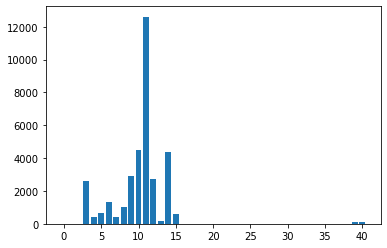

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt



# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

for i in range(len(fit.scores_)):
	print('Feature %d: %f' % (i, fit.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)
plt.show()
#features = fit.transform(x)
# Summarize selected features
#print(features[0:5,:])

In [ ]:
selected_features=x[['discharge_disposition_id', 'time_in_hospital', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'change', 'diabetesMed']]
len(selected_features)

93225

In [ ]:
selected_features.head()

,discharge_disposition_id,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed
1,1,3,18,0,0,0,9,0,1
3,1,2,16,0,0,0,7,0,1
4,1,1,8,0,0,0,5,0,1
5,1,3,16,0,0,0,9,1,1
7,1,5,12,0,0,0,8,1,1


In [ ]:
len(y)

93225

In [ ]:
y.to_csv('label.csv')

In [ ]:
selected_features.to_csv('features.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from joblib import dump,load
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pickle

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(selected_features,y,test_size=0.2,random_state=40)

# creating scaler scale var.
norm = MinMaxScaler()
# fit the scal
norm_fit = norm.fit(xtrain)
pickle.dump(norm_fit, open("scaler.pkl", 'wb'))
dump(norm_fit,'scaler.joblib')
# transfromation of trainig data
scal_xtrain = norm_fit.transform(xtrain)

# transformation of testing data
scal_xtest = norm_fit.transform(xtest)
print(scal_xtrain)

[[0.    0.231 0.295 ... 0.267 0.    1.   ]
 [0.    0.154 0.051 ... 0.533 0.    1.   ]
 [0.111 0.615 0.103 ... 0.533 1.    0.   ]
 ...
 [0.074 0.154 0.141 ... 0.533 0.    1.   ]
 [0.    0.154 0.167 ... 0.2   0.    1.   ]
 [0.63  0.308 0.09  ... 0.533 1.    0.   ]]


In [36]:
  
# create model variable
rnd = RandomForestClassifier()
  
# fit the model
fit_rnd = rnd.fit(xtrain,ytrain)  

In [39]:
#predicting our target variable
y_predict = fit_rnd.predict(xtest)

#predicting the probability of our target variable
y_predict_probabilty = fit_rnd.predict_proba(xtest)

In [40]:
print(list(y_predict))

[2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 

In [43]:
print(y_predict_probabilty)

[[0.057 0.091 0.853]
 [0.01  0.457 0.533]
 [0.    0.298 0.702]
 ...
 [0.09  0.517 0.393]
 [0.275 0.48  0.245]
 [0.074 0.426 0.5  ]]


In [44]:
# checking the accuracy score
rnd_score = fit_rnd.score(xtest,ytest) 
  
print('score of model is : ',rnd_score)
  
pickle.dump(fit_rnd, open("model.pkl", 'wb'))
#dump(rnd, 'model.joblib')

score of model is :  0.5227138643067847


In [ ]:
from sklearn.metrics import classification_report
x_predict = list(rnd.predict(xtest))
print(classification_report(ytest, x_predict))
#df = {'predicted':x_predict,'orignal':ytest}
#df

              precision    recall  f1-score   support

           0       0.16      0.08      0.11      2024
           1       0.44      0.37      0.40      6689
           2       0.59      0.72      0.65      9932

    accuracy                           0.52     18645
   macro avg       0.40      0.39      0.39     18645
weighted avg       0.49      0.52      0.50     18645

